In [62]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [63]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [64]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc
import cmocean as cm
import glob
import numpy as np
from salishsea_tools import (
    viz_tools,
)
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_src')
import mocsy
import CCCma
import CCCma_stations as cs
from matplotlib import reload
import arrow

%matplotlib inline

/home/tjarniko/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [65]:
reload(cs)

<module 'CCCma_stations' from '/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_src/CCCma_stations.py'>

In [66]:

print(cs.STATIONS['JDFB'])
print(list(cs.STATIONS.keys()))

print(cs.STATIONS['JDFB']['serialno'])

{'fullname': 'Juan de Fuca Boundary', 'code': 'JDF(B)', 'x': 0, 'y': 400, 'color': 'sienna', 'serialno': 0}
['JDFB', 'JDFC', 'JS', 'TI', 'FR', 'FP', 'NS', 'CS', 'HS', 'PS', 'SE', 'BS']
0


In [67]:
def getpath(nested_dict, value, prepath=()):
    for k, v in nested_dict.items():
        path = prepath + (k,)
        if v == value: # found value
            return path
        elif hasattr(v, 'items'): # v is a dict
            p = getpath(v, value, path) # recursive call
            if p is not None:
                return p

p = getpath(cs.STATIONS,3)
stn = (p[0])

col = cs.STATIONS[stn]['color']
print(col)

red


In [68]:
def range_analyzer(start,end,ftype,varname):
    start_run = arrow.get(start)
    end_run = arrow.get(end)
    arrow_array = []
    for r in arrow.Arrow.span_range('day', start_run, end_run):
        arrow_array.append(r)
    
    print('days: '+str(len(arrow_array)))
    dayslen = len(arrow_array)
    print('stations: '+str(len(cs.STATIONS)))
    statlen = len(cs.STATIONS)
    
    #DIC,TA,NIT,Sil
    
    storar_mn_base = np.zeros([statlen,dayslen])
    storar_std_base = np.zeros([statlen,dayslen])
    storar_mn_sens = np.zeros([statlen,dayslen])
    storar_std_sens = np.zeros([statlen,dayslen])
    
    for i in range(0,len(arrow_array)):
        tdate = arrow_array[i][0]
        ddmmmyy = tdate.format('DDMMMYY').lower()
        ymd = tdate.format('YYYYMMDD')
        nc_base = '/results2/SalishSea/hindcast.201812_annex/' + ddmmmyy +'/SalishSea_1d_*_' + ftype +'_T.nc'
        nc_sens = '/data/tjarniko/results/FPARTY/fchlr/SKOG_1d_*'+ ftype +'*' + ymd + '-' + ymd + '.nc'
        print('ANALYZING ',ddmmmyy)
        tnc_base = glob.glob(nc_base) 
        tnc_sens = glob.glob(nc_sens)
        print(tnc_base[0])
        print(tnc_sens[0])        
        nc_base = nc.Dataset(tnc_base[0])
        nc_sens = nc.Dataset(tnc_sens[0])

        var_base = nc_base.variables[varname]
        var_sens = nc_sens.variables[varname]

        for s in cs.STATIONS:
            #print(s)
            tx = (cs.STATIONS[s]['x'])
            ty = cs.STATIONS[s]['y']
            serno = cs.STATIONS[s]['serialno']
            tdatB = var_base[0,0:5,ty:ty+20,tx:tx+20]
            tdatB[tdatB==0]=np.nan
            tdatS = var_sens[0,0:5,ty:ty+20,tx:tx+20]
            tdatS[tdatS==0]=np.nan
            storar_mn_base[serno,i] = np.nanmean(tdatB)
            storar_std_base[serno,i] = np.nanstd(tdatB)
            storar_mn_sens[serno,i] = np.nanmean(tdatS)
            storar_std_sens[serno,i] = np.nanstd(tdatS)
            #print(storar[serno,i])
            
    return storar_mn_base, storar_std_base, storar_mn_sens, storar_std_sens, dayslen

In [69]:
# start = '2018-02-01'
# end = '2018-07-15'

# storar_mn_base, storar_std_base, storar_mn_sens, storar_std_sens, days = \
# range_analyzer(start,end,'ptrc','nitrate')

# ncname = 'NIT_chlr_surf5m_01feb18_15jul18.nc'

# f = nc.Dataset(ncname,'w', format='NETCDF4') #'w' stands for write
# g = f.createGroup('surf_timeseries')
# g.createDimension('stn',len(cs.STATIONS))
# g.createDimension('time', days)

# ts = g.createVariable('timeseriesB','f4',('stn','time'))
# ts[:] = storar_mn_base[:]
# ts2 = g.createVariable('timeseriesB_std','f4',('stn','time'))
# ts2[:] = storar_std_base[:]

# ts3 = g.createVariable('timeseriesS','f4',('stn','time'))
# ts3[:] = storar_mn_sens[:]
# ts4 = g.createVariable('timeseriesS_std','f4',('stn','time'))
# ts4[:] = storar_std_sens[:]

# f.close()



In [70]:
# start = '2018-02-01'
# end = '2018-07-15'

# storar_mn_base, storar_std_base, storar_mn_sens, storar_std_sens, days = \
# range_analyzer(start,end,'carp','dissolved_inorganic_carbon')

# ncname = 'DIC_chlr_surf5m_01feb18_15jul18.nc'

# f = nc.Dataset(ncname,'w', format='NETCDF4') #'w' stands for write
# g = f.createGroup('surf_timeseries')
# g.createDimension('stn',len(cs.STATIONS))
# g.createDimension('time', days)

# ts = g.createVariable('timeseriesB','f4',('stn','time'))
# ts[:] = storar_mn_base[:]
# ts2 = g.createVariable('timeseriesB_std','f4',('stn','time'))
# ts2[:] = storar_std_base[:]

# ts3 = g.createVariable('timeseriesS','f4',('stn','time'))
# ts3[:] = storar_mn_sens[:]
# ts4 = g.createVariable('timeseriesS_std','f4',('stn','time'))
# ts4[:] = storar_std_sens[:]

# f.close()

In [71]:
dic = nc.Dataset('DIC_chlr_surf5m_01feb18_15jul18.nc')
nit = nc.Dataset('NIT_chlr_surf5m_01feb18_15jul18.nc')

dic_B = dic['surf_timeseries']['timeseriesB']
dic_S = dic['surf_timeseries']['timeseriesS']

nit_B = nit['surf_timeseries']['timeseriesB']
nit_S = nit['surf_timeseries']['timeseriesS']

165


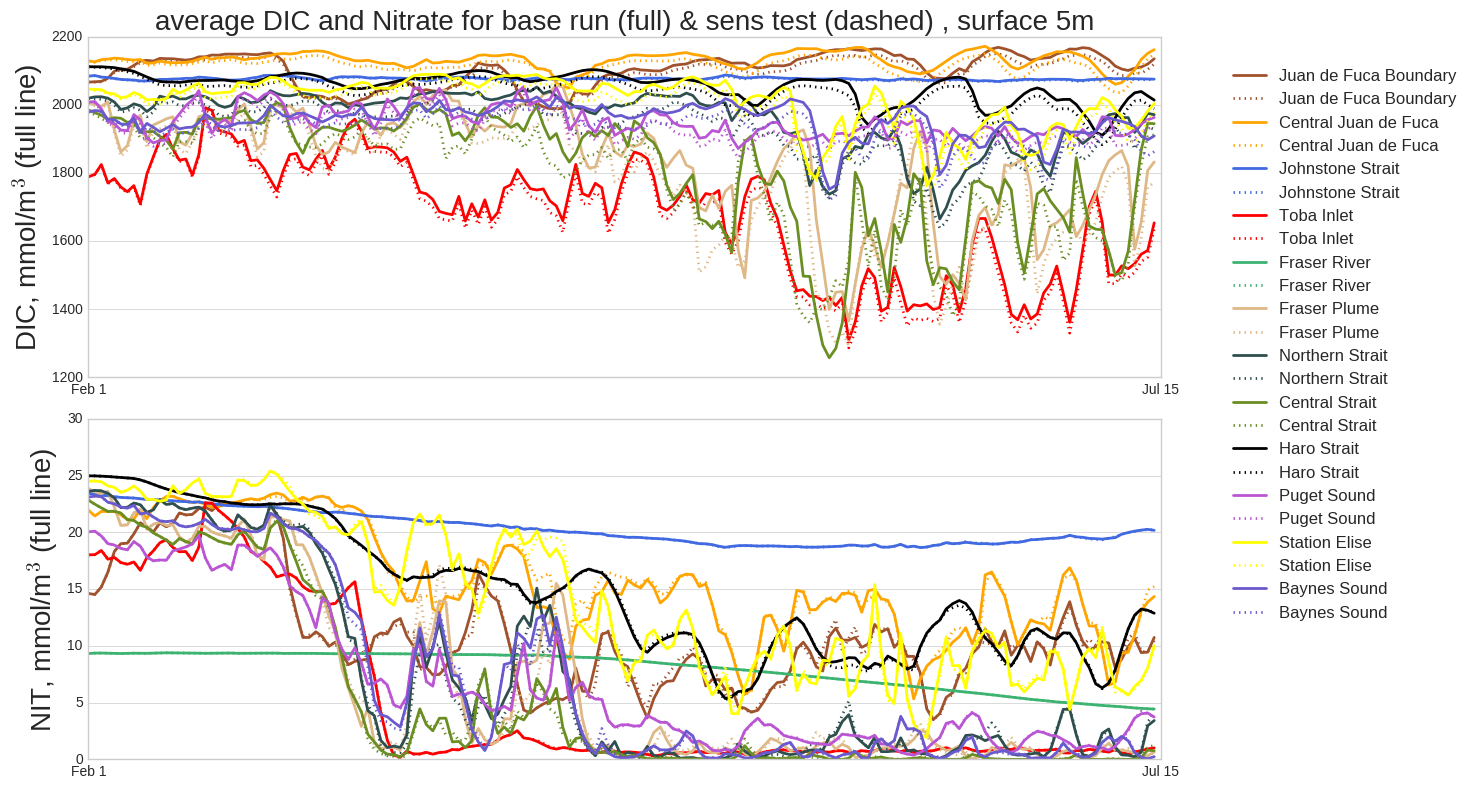

In [72]:
dys = len(dic_B[0,:])
print(dys)
fig = plt.figure(figsize=(12,8))

for i in range(1,3):
    ax = fig.add_subplot(2,1,i)
    plt.xlim([0,93])

    if i == 1:
        for j in range (0,len(dic_B[:,0])):
            dB = dic_B[j,:]
            dS = dic_S[j,:]
            p = getpath(cs.STATIONS,j)
            stn = (p[0])
            col = cs.STATIONS[stn]['color']
            lab = cs.STATIONS[stn]['fullname']
            ax.plot(dB,col,label=lab,linewidth=2, linestyle='-')
            ax.plot(dS,col,label=lab,linewidth=2, linestyle=':')
            plt.title('average DIC and Nitrate for base run (full) & sens test (dashed) , surface 5m', fontsize = 20)
            plt.ylabel('DIC, mmol/m$^3$ (full line)', fontsize = 20)
            plt.xlim([0,dys])
            plt.xticks([0,dys])
            ax.set_xticklabels(['Feb 1','Jul 15'])
            plt.legend(bbox_to_anchor=(1.29, 0.95))
            plt.ylim([1200,2200])
    
    #ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    if i == 2:
        for j in range (0,len(dic_B[:,0])):
            nB = nit_B[j,:]
            nS = nit_S[j,:]
            p = getpath(cs.STATIONS,j)
            stn = (p[0])
            col = cs.STATIONS[stn]['color']
            lab = cs.STATIONS[stn]['fullname']
            ax.plot(nB,col,label=lab,linewidth=2, linestyle='-')
            ax.plot(nS,col,label=lab,linewidth=2, linestyle=':')
            #plt.title('average DIC (full line) and DON (dashed line), surface 5m', fontsize = 20)
            plt.ylabel('NIT, mmol/m$^3$ (full line)', fontsize = 20)
            plt.xlim([0,dys])
            plt.xticks([0,dys])
            ax.set_xticklabels(['Feb 1','Jul 15'])
            #plt.legend(bbox_to_anchor=(1.29, 0.95))
            #plt.ylim([1200,2200])

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

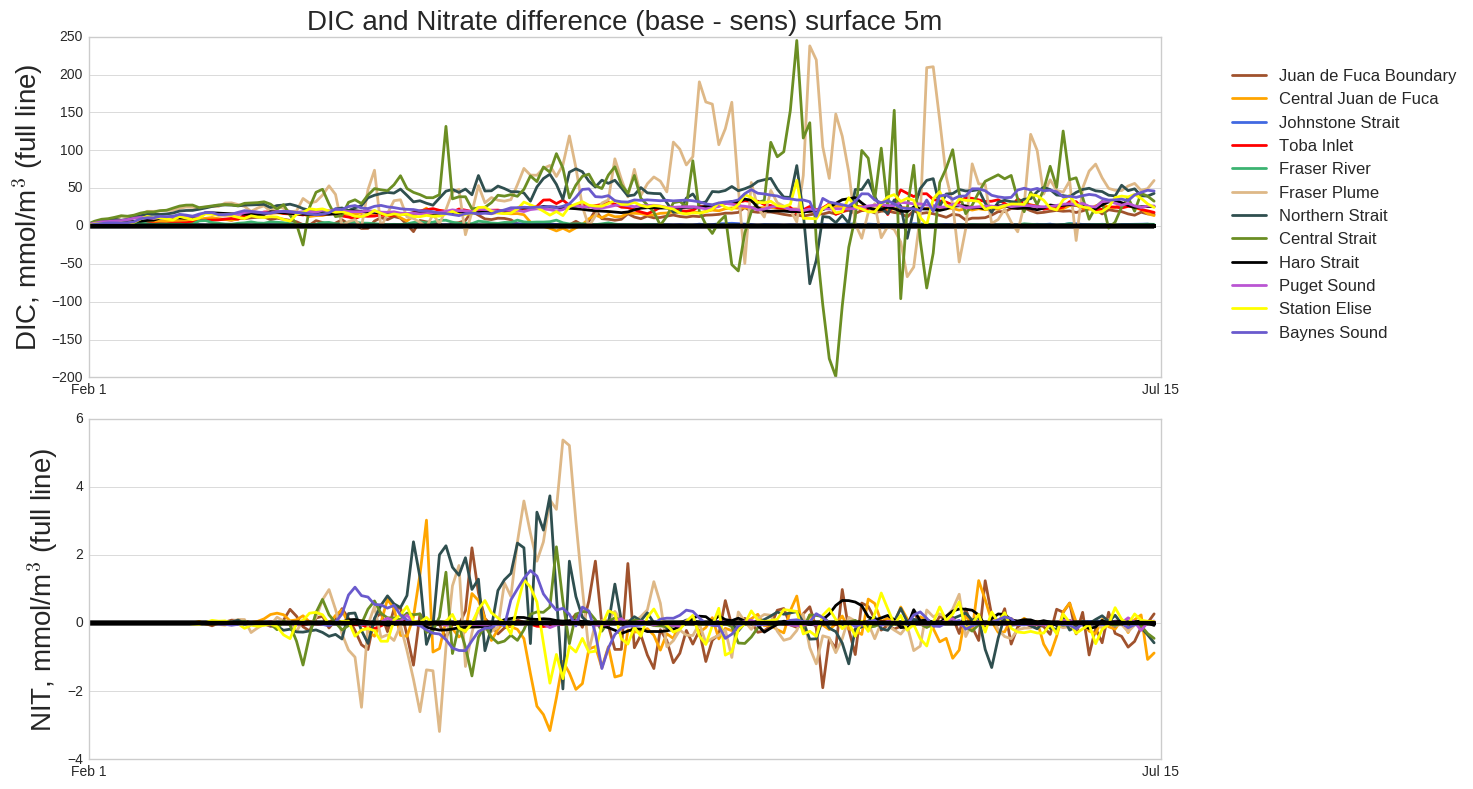

In [73]:

fig = plt.figure(figsize=(12,8))

for i in range(1,3):
    ax = fig.add_subplot(2,1,i)
    plt.xlim([0,93])

    if i == 1:
        for j in range (0,len(dic_B[:,0])):
            dB = dic_B[j,:]
            dS = dic_S[j,:]
            zer = np.zeros_like(dS)
            p = getpath(cs.STATIONS,j)
            stn = (p[0])
            col = cs.STATIONS[stn]['color']
            lab = cs.STATIONS[stn]['fullname']
            ax.plot(dB-dS,col,label=lab,linewidth=2, linestyle='-')
            ax.plot(zer,'k',linewidth=3, linestyle='-')
            #ax.plot(dS,col,label=lab,linewidth=2, linestyle=':')
            plt.title('DIC and Nitrate difference (base - sens) surface 5m', fontsize = 20)
            plt.ylabel('DIC, mmol/m$^3$ (full line)', fontsize = 20)
            plt.xlim([0,dys])
            plt.xticks([0,dys])
            ax.set_xticklabels(['Feb 1','Jul 15'])
            plt.legend(bbox_to_anchor=(1.29, 0.95))
            #plt.ylim([1200,2200])
    
    #ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    if i == 2:
        for j in range (0,len(dic_B[:,0])):
            nB = nit_B[j,:]
            nS = nit_S[j,:]
            p = getpath(cs.STATIONS,j)
            stn = (p[0])
            col = cs.STATIONS[stn]['color']
            lab = cs.STATIONS[stn]['fullname']
            ax.plot(nB-nS,col,label=lab,linewidth=2, linestyle='-')
            ax.plot(zer,'k',linewidth=3, linestyle='-')
            #ax.plot(nS,col,label=lab,linewidth=2, linestyle=':')
            #plt.title('average DIC (full line) and DON (dashed line), surface 5m', fontsize = 20)
            plt.ylabel('NIT, mmol/m$^3$ (full line)', fontsize = 20)
            plt.xlim([0,dys])
            plt.xticks([0,dys])
            ax.set_xticklabels(['Feb 1','Jul 15'])
            #plt.legend(bbox_to_anchor=(1.29, 0.95))
            #plt.ylim([1200,2200])

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [74]:
# 3, 5 6, 7 
print(cs.STATIONS)
j = 3
p = getpath(cs.STATIONS,j)
stn = (p[0])
print(stn)

{'JDFB': {'fullname': 'Juan de Fuca Boundary', 'code': 'JDF(B)', 'x': 0, 'y': 400, 'color': 'sienna', 'serialno': 0}, 'JDFC': {'fullname': 'Central Juan de Fuca', 'code': 'JDF(C)', 'x': 100, 'y': 290, 'color': 'orange', 'serialno': 1}, 'JS': {'fullname': 'Johnstone Strait', 'code': 'JS', 'x': 42, 'y': 878, 'color': 'royalblue', 'serialno': 2}, 'TI': {'fullname': 'Toba Inlet', 'code': 'TI', 'x': 265, 'y': 760, 'color': 'red', 'serialno': 3}, 'FR': {'fullname': 'Fraser River', 'code': 'FR', 'x': 345, 'y': 415, 'color': 'mediumseagreen', 'serialno': 4}, 'FP': {'fullname': 'Fraser Plume', 'code': 'FP', 'x': 255, 'y': 415, 'color': 'burlywood', 'serialno': 5}, 'NS': {'fullname': 'Northern Strait', 'code': 'NS', 'x': 155, 'y': 640, 'color': 'darkslategrey', 'serialno': 6}, 'CS': {'fullname': 'Central Strait', 'code': 'CS', 'x': 230, 'y': 510, 'color': 'olivedrab', 'serialno': 7}, 'HS': {'fullname': 'Haro Strait', 'code': 'HS', 'x': 215, 'y': 315, 'color': 'black', 'serialno': 8}, 'PS': {'ful

/home/tjarniko/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


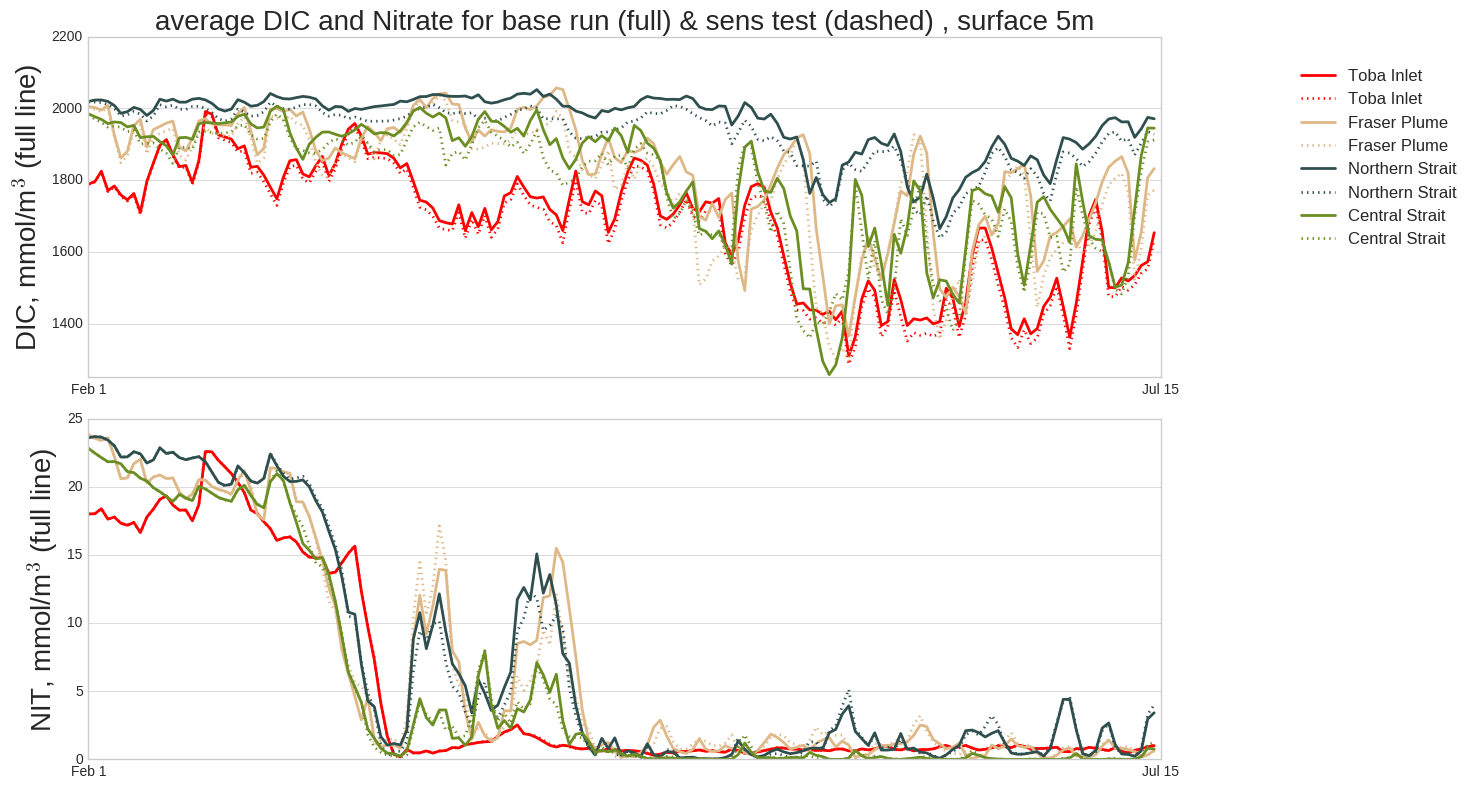

In [75]:

fig = plt.figure(figsize=(12,8))

for i in range(1,3):
    ax = fig.add_subplot(2,1,i)
    plt.xlim([0,93])

    if i == 1:
        for j in range (0,len(dic_B[:,0])):
            dB = dic_B[j,:]
            dS = dic_S[j,:]
            if j == 3 or j ==5 or j == 6 or j ==7:
                p = getpath(cs.STATIONS,j)
                stn = (p[0])
                col = cs.STATIONS[stn]['color']
                lab = cs.STATIONS[stn]['fullname']
                ax.plot(dB,col,label=lab,linewidth=2, linestyle='-')
                ax.plot(dS,col,label=lab,linewidth=2, linestyle=':')
                zer = np.zeros_like(dS)
                ax.plot(zer,'k',linewidth=3, linestyle='-')
            plt.title('average DIC and Nitrate for base run (full) & sens test (dashed) , surface 5m', fontsize = 20)
            plt.ylabel('DIC, mmol/m$^3$ (full line)', fontsize = 20)
            plt.xlim([0,dys])
            plt.xticks([0,dys])
            ax.set_xticklabels(['Feb 1','Jul 15'])
            plt.legend(bbox_to_anchor=(1.29, 0.95))
            plt.ylim([1250,2200])
    
    #ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
#     if i == 2:
#         for j in range (0,len(dic_B[:,0])):
#             nB = nit_B[j,:]
#             nS = nit_S[j,:]
#             p = getpath(cs.STATIONS,j)
#             stn = (p[0])
#             col = cs.STATIONS[stn]['color']
#             lab = cs.STATIONS[stn]['fullname']
#             ax.plot(nB-nS,col,label=lab,linewidth=2, linestyle='-')
#             ax.plot(zer,'k',linewidth=3, linestyle='-')
#             #ax.plot(nS,col,label=lab,linewidth=2, linestyle=':')
#             #plt.title('average DIC (full line) and DON (dashed line), surface 5m', fontsize = 20)
#             plt.ylabel('NIT, mmol/m$^3$ (full line)', fontsize = 20)
#             plt.xlim([0,29])
#             plt.xticks([0,29])
#             ax.set_xticklabels(['Feb 1','Jul 15'])
#             #plt.legend(bbox_to_anchor=(1.29, 0.95)
    
    if i == 2:
        for j in range (0,len(dic_B[:,0])):
            nB = nit_B[j,:]
            nS = nit_S[j,:]
            if j == 3 or j ==5 or j == 6 or j ==7:
                p = getpath(cs.STATIONS,j)
                stn = (p[0])
                col = cs.STATIONS[stn]['color']
                lab = cs.STATIONS[stn]['fullname']
                ax.plot(nB,col,label=lab,linewidth=2, linestyle='-')
                ax.plot(nS,col,label=lab,linewidth=2, linestyle=':')
            #plt.title('average DIC (full line) and DON (dashed line), surface 5m', fontsize = 20)
            plt.ylabel('NIT, mmol/m$^3$ (full line)', fontsize = 20)
            plt.xlim([0,dys])
            plt.xticks([0,dys])
            ax.set_xticklabels(['Feb 1','Jul 15'])
            #plt.legend(bbox_to_anchor=(1.29, 0.95))
            #plt.ylim([1200,2200])

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## Difference plots, subset

/home/tjarniko/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


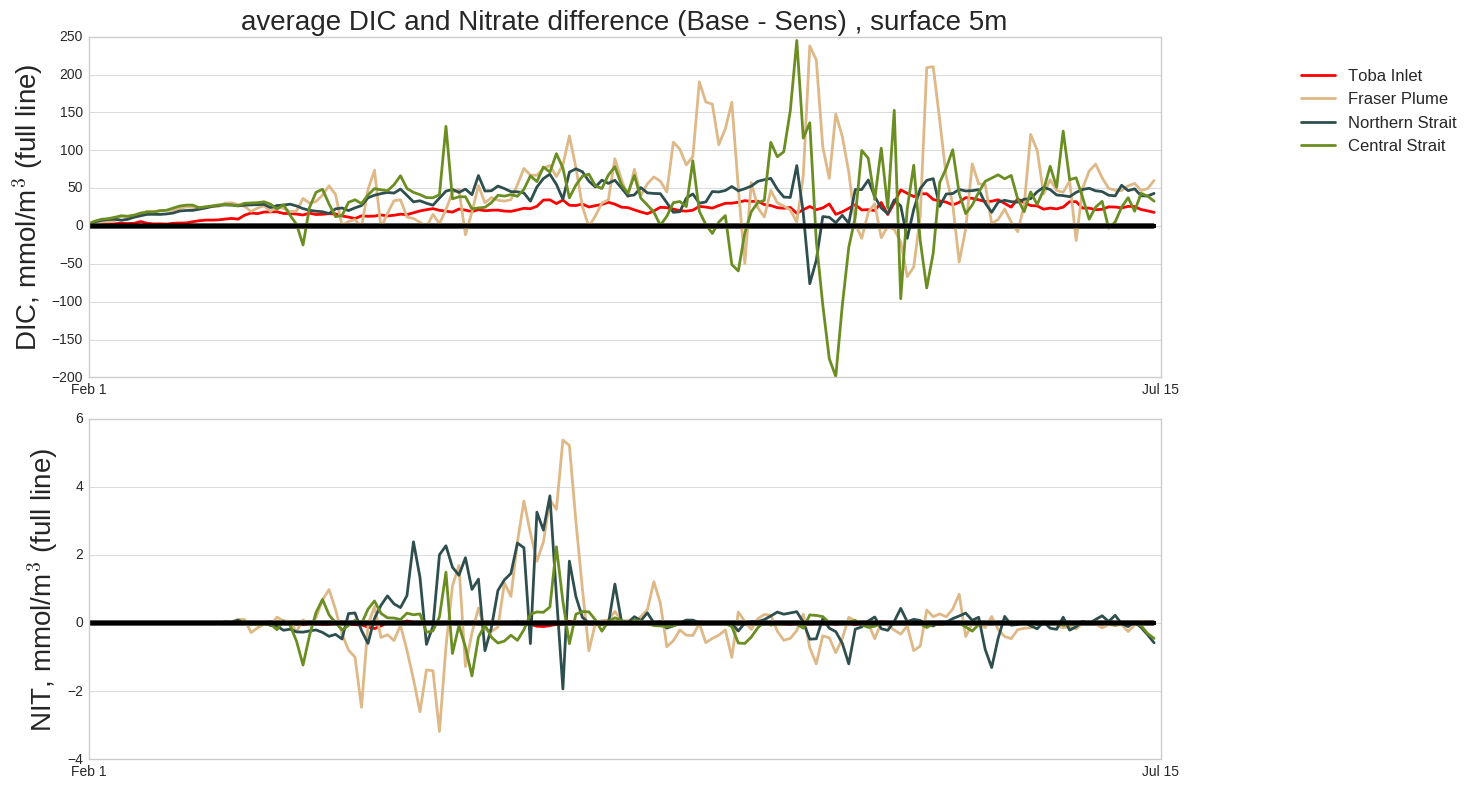

In [76]:

fig = plt.figure(figsize=(12,8))

for i in range(1,3):
    ax = fig.add_subplot(2,1,i)
    plt.xlim([0,93])

    if i == 1:
        for j in range (0,len(dic_B[:,0])):
            dB = dic_B[j,:]
            dS = dic_S[j,:]
            zer = np.zeros_like(dS)
            if j == 3 or j ==5 or j == 6 or j ==7:
                p = getpath(cs.STATIONS,j)
                stn = (p[0])
                col = cs.STATIONS[stn]['color']
                lab = cs.STATIONS[stn]['fullname']
                ax.plot(dB-dS,col,label=lab,linewidth=2, linestyle='-')
                
                #ax.plot(dS,col,label=lab,linewidth=2, linestyle=':')
            ax.plot(zer,'k',linewidth=3, linestyle='-')
            plt.title('average DIC and Nitrate difference (Base - Sens) , surface 5m', fontsize = 20)
            plt.ylabel('DIC, mmol/m$^3$ (full line)', fontsize = 20)
            plt.xlim([0,dys])
            plt.xticks([0,dys])
            ax.set_xticklabels(['Feb 1','Jul 15'])
            plt.legend(bbox_to_anchor=(1.29, 0.95))
            #plt.ylim([1200,2200])
    
    #ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    if i == 2:
        for j in range (0,len(dic_B[:,0])):
            nB = nit_B[j,:]
            nS = nit_S[j,:]
            if j == 3 or j ==5 or j == 6 or j ==7:
                p = getpath(cs.STATIONS,j)
                stn = (p[0])
                col = cs.STATIONS[stn]['color']
                lab = cs.STATIONS[stn]['fullname']
                ax.plot(nB-nS,col,label=lab,linewidth=2, linestyle='-')
                #ax.plot(nS,col,label=lab,linewidth=2, linestyle=':')
            #plt.title('average DIC (full line) and DON (dashed line), surface 5m', fontsize = 20)
            ax.plot(zer,'k',linewidth=3, linestyle='-')
            plt.ylabel('NIT, mmol/m$^3$ (full line)', fontsize = 20)
            plt.xlim([0,dys])
            plt.xticks([0,dys])
            ax.set_xticklabels(['Feb 1','Jul 15'])
            #plt.legend(bbox_to_anchor=(1.29, 0.95))
            #plt.ylim([1200,2200])

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## DIC:Nit ratio 'improves' ...

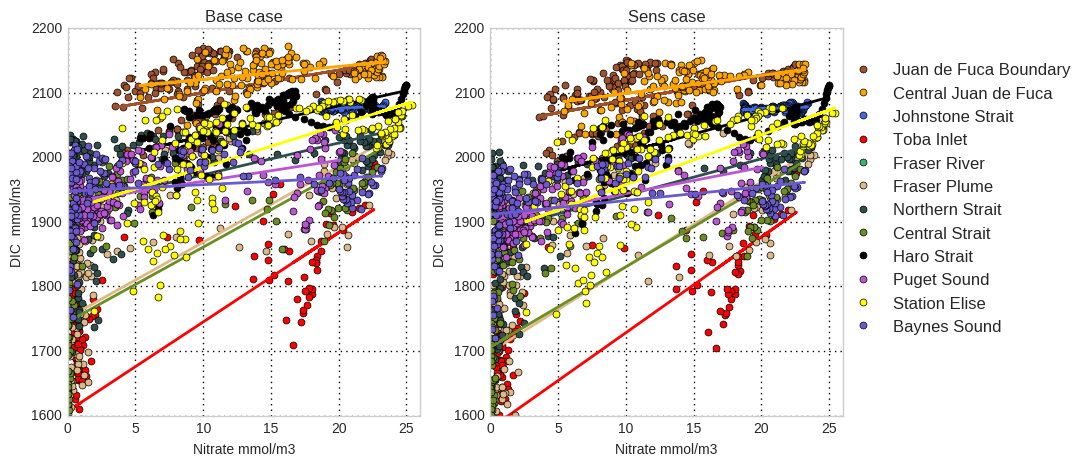

In [77]:
fig = plt.figure(figsize=(10,5))
from numpy.polynomial.polynomial import polyfit

for i in range(1,3):
    if i == 1:
        ax = fig.add_subplot(1,2,i)
        ax.grid(color='k', linestyle=':', linewidth=1)
        for j in range (0,len(dic_B[:,0])):
            dB = dic_B[j,:]
            nB = nit_B[j,:]
            p = getpath(cs.STATIONS,j)
            stn = (p[0])
            col = cs.STATIONS[stn]['color']
            lab = cs.STATIONS[stn]['fullname']
            ax.plot(nB,dB,col,marker='o',label=lab,markersize=5,linestyle='None')
            b, m = polyfit(nB, dB, 1)
            plt.plot(nB, b + m * nB,col, linestyle='-',linewidth=2)
        ax.set_ylabel('DIC  mmol/m3')
        ax.set_xlabel('Nitrate mmol/m3')
        ax.set_ylim(1600,2200)
        ax.set_xlim(0,26)
        ax.set_title('Base case')

    if i == 2:
        ax = fig.add_subplot(1,2,i)
        ax.grid(color='k', linestyle=':', linewidth=1)
        for j in range (0,len(dic_B[:,0])):
            dS = dic_S[j,:]
            nS = nit_S[j,:]
            p = getpath(cs.STATIONS,j)
            stn = (p[0])
            col = cs.STATIONS[stn]['color']
            lab = cs.STATIONS[stn]['fullname']
            ax.plot(nS,dS,col,marker='o',label=lab,markersize=5,linestyle='None')
            b, m = polyfit(nS, dS, 1)
            plt.plot(nS, b + m * nS,col, linestyle='-',linewidth=2)
        ax.set_ylabel('DIC  mmol/m3')
        ax.set_xlabel('Nitrate mmol/m3')
        ax.set_ylim(1600,2200)
        ax.set_xlim(0,26)
        ax.set_title('Sens case')
        plt.legend(bbox_to_anchor=(1.69, 0.95))
        #ax.plot([1000,2400],[1000,2400],'k')

In [78]:
print('test cell')

test cell
